<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/LinearRegressionProf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split

boston = load_boston()


data = pd.DataFrame(boston.data, columns=boston.feature_names, index=None)
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

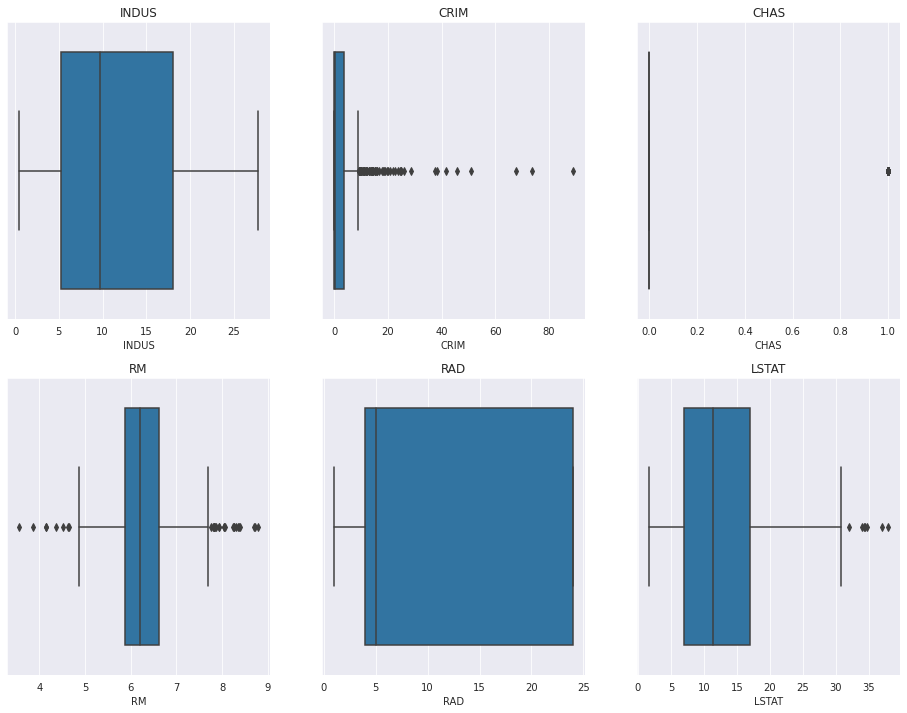

In [ ]:
X = data.loc[:,['INDUS','CRIM','CHAS','RM','RAD','LSTAT']].copy()
y = pd.DataFrame(boston.target, index=None, columns=['target'])

sns.set_style('darkgrid')
plt.figure(figsize=(16,12))


plt.subplot(2, 3, 1)
plt.title('INDUS')
sns.boxplot(X.INDUS)

plt.subplot(2,3,2)
plt.title('CRIM')
sns.boxplot(X.CRIM)

plt.subplot(2,3,3)
plt.title('CHAS')
sns.boxplot(X.CHAS)

plt.subplot(2,3,4)
plt.title('RM')
sns.boxplot(X.RM)

plt.subplot(2,3,5)
plt.title('RAD')
sns.boxplot(X.RAD)

plt.subplot(2,3,6)
plt.title('LSTAT')
sns.boxplot(X.LSTAT)

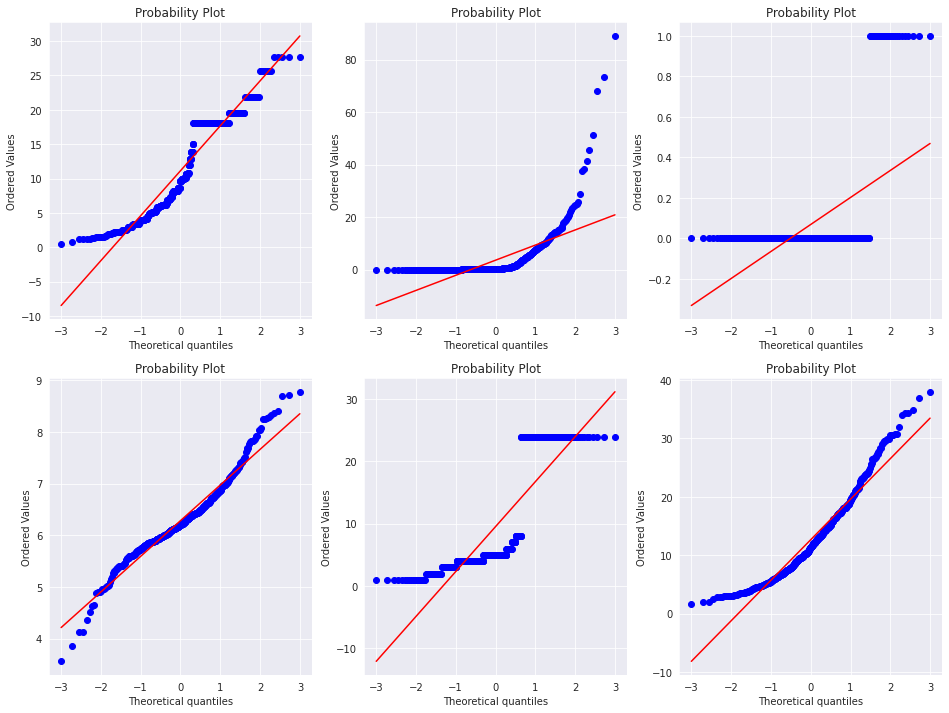

In [ ]:
plt.figure(figsize=(16,12))

for i in range(len(X.columns)):

  plt.subplot(2,3,i+1)
  stats.probplot(X.iloc[:,i], dist='norm', plot=plt)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


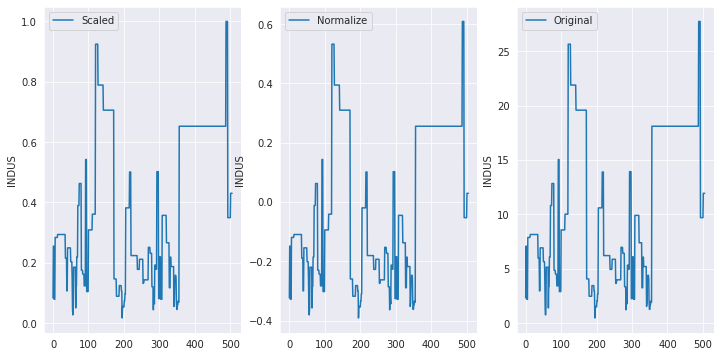

In [ ]:
indus = X.iloc[:,0].copy()

plt.figure(figsize=(12,6))

a = indus / np.max(indus)
b = (indus - np.mean(indus))/(np.max(indus) - np.min(indus))
c = (indus - np.max(indus))/(np.max(indus) - np.min(indus))
d = (indus - np.mean(indus))/np.std(indus)
plt.subplot(1,3,1)
sns.lineplot(range(0, len(a)), a, label='Scaled')

plt.subplot(1,3,2)
sns.lineplot(range(0, len(b)), b, label='Normalize')

plt.subplot(1,3,3)
sns.lineplot(range(0, len(indus)), indus, label='Original')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


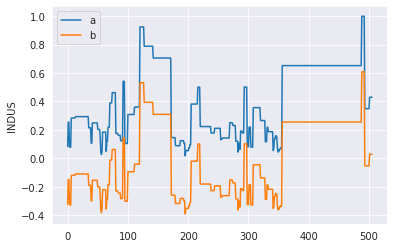

In [ ]:
sns.lineplot(range(0, len(indus)), a, label='a')
sns.lineplot(range(0, len(indus)), b, label='b')
#sns.lineplot(range(0, len(indus)), indus, label='Original')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

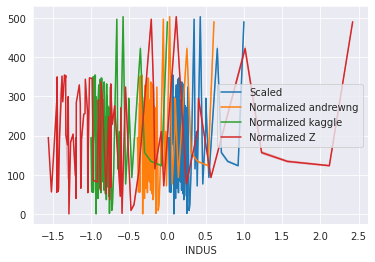

In [ ]:
sns.lineplot(a, range(0, len(a)), label='Scaled')
sns.lineplot(b, range(0, len(b)), label='Normalized andrewng')
sns.lineplot(c, range(0, len(c)), label='Normalized kaggle')
sns.lineplot(d, range(0, len(d)), label='Normalized Z')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


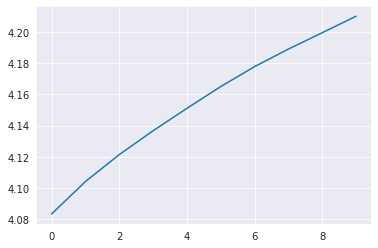

In [ ]:
Xs = (X/np.max(X)).copy()
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

X_train, X_test, y_train, y_test = train_test_split(Xs, y, random_state=0)
error = []

for i in np.linspace(0.15, 1, 10):
  
  rd = Ridge(alpha=i, max_iter=50, solver='saga', random_state=0).fit(X_train, y_train)
  pred = rd.predict(X_test)
  error.append(mae(y_test, pred))

sns.lineplot(range(0,10), error)

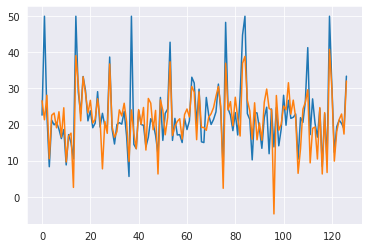

In [ ]:
ridge = Ridge(alpha=0.15, solver='saga', max_iter=50, random_state=32).fit(X_train, y_train)

predict = ridge.predict(X_test)

plt.plot(range(0, len(predict)), y_test)
plt.plot(range(0, len(predict)), predict)


In [ ]:
ridge.coef_

array([[ -2.03162846,  -6.083985  ,   3.94039378,  41.92483186,
         -2.15107363, -20.74093006]])

In [ ]:
from scipy.stats import shapiro, kstest

for i in range(0,6):

  stadistico, p_value = kstest(X.iloc[:,i], 'norm')
  stadisticos, p_values = shapiro(X.iloc[:,i])
  print("{} KSmirnov\tStadistico: {:.2f}\tP_value: {:.2f}\n{} Shapiro\tStadistico: {:.2f}\tP_value: {:.2f}".format(X.columns[i], stadistico, p_value,
                                                                                                  X.columns[i], stadisticos, p_values))

INDUS KSmirnov	Stadistico: 0.94	P_value: 0.00
INDUS Shapiro	Stadistico: 0.90	P_value: 0.00
CRIM KSmirnov	Stadistico: 0.50	P_value: 0.00
CRIM Shapiro	Stadistico: 0.45	P_value: 0.00
CHAS KSmirnov	Stadistico: 0.50	P_value: 0.00
CHAS Shapiro	Stadistico: 0.27	P_value: 0.00
RM KSmirnov	Stadistico: 1.00	P_value: 0.00
RM Shapiro	Stadistico: 0.96	P_value: 0.00
RAD KSmirnov	Stadistico: 0.94	P_value: 0.00
RAD Shapiro	Stadistico: 0.68	P_value: 0.00
LSTAT KSmirnov	Stadistico: 0.99	P_value: 0.00
LSTAT Shapiro	Stadistico: 0.94	P_value: 0.00


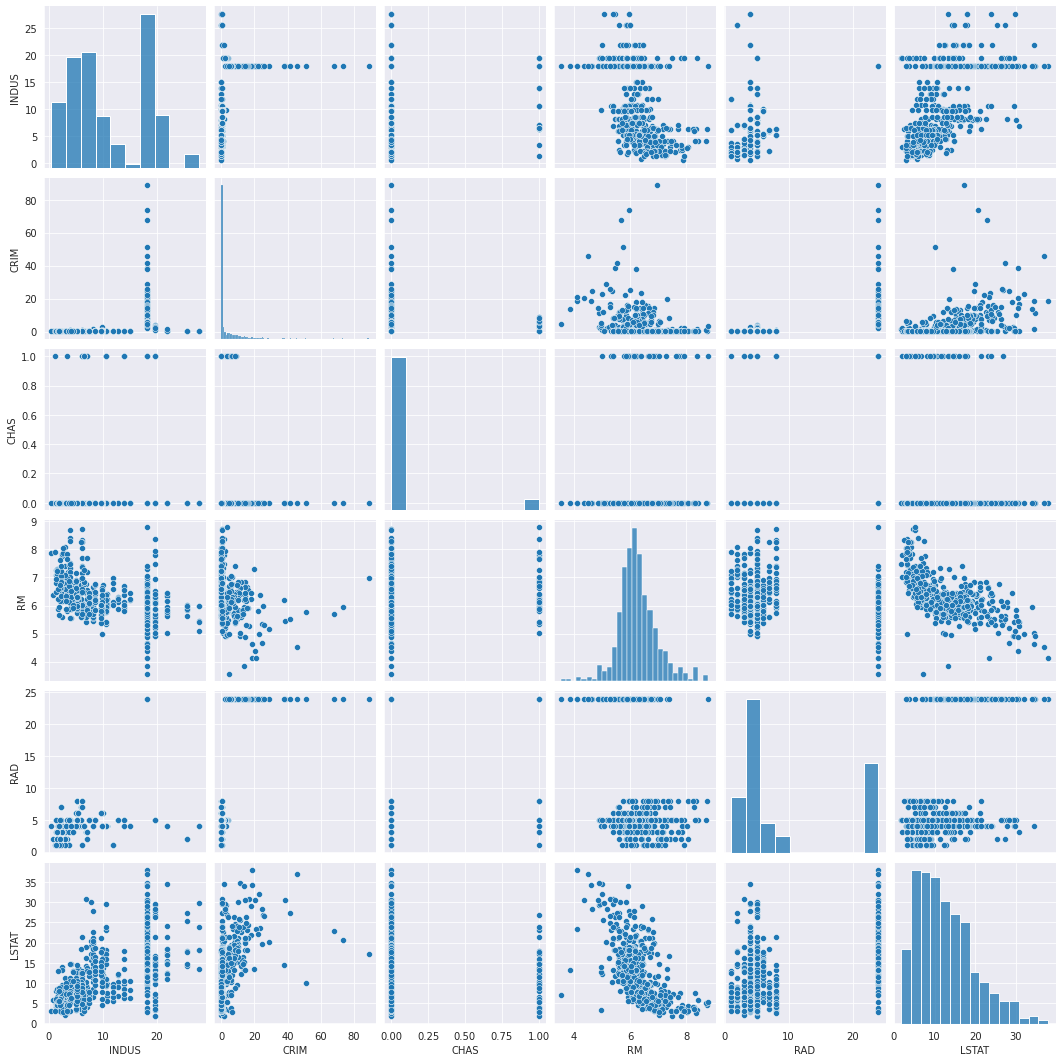

In [ ]:
sns.pairplot(X)

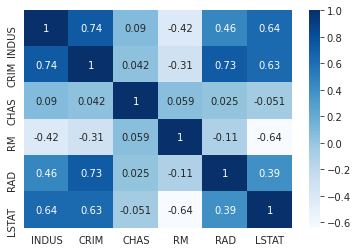

In [ ]:
X_corr = X.corr(method='spearman')

sns.heatmap(X_corr, annot=True, cmap='Blues')

In [ ]:
import pingouin as pg

corr_pg = pg.pairwise_corr(X, method='pearson')

pingouin = corr_pg.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']]

pingouin[pingouin['p-unc']<=0.05]

,X,Y,n,r,p-unc
7,CRIM,RAD,506,0.625505,2.693844e-56
13,RM,LSTAT,506,-0.613808,1.033009e-53
4,INDUS,LSTAT,506,0.603800,1.381948e-51
3,INDUS,RAD,506,0.595129,8.368289e-50
14,RAD,LSTAT,506,0.488676,9.904457e-32
8,CRIM,LSTAT,506,0.455621,2.654277e-27
0,INDUS,CRIM,506,0.406583,1.450349e-21
2,INDUS,RM,506,-0.391676,5.328458e-20
6,CRIM,RM,506,-0.219247,6.346703e-07
12,RM,RAD,506,-0.209847,1.918446e-06


In [ ]:
frame = (X, y)
dta = pd.concat(frame, axis=1)
dta_corr = dta.corr(method='spearman')

sns.heatmap(dta_corr, annot=True, cmap='cool')

In [ ]:
dta_pg = pg.pairwise_corr(dta, method='pearson')
dta_pg.sort_values(by=['p-unc'])[['X','Y','n','r','p-unc']]

In [ ]:
X.columns


Index(['INDUS', 'CRIM', 'CHAS', 'RM', 'RAD', 'LSTAT'], dtype='object')